In [230]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()
import chart_studio as cs
from IPython.display import display, HTML
%matplotlib inline


In [34]:
import seaborn as sns

In [35]:
#estrapolo i dati dal 2011 al 2017 per trovare la combinazione di portafoglio adeguata
assets=['AVGO', 'GOOG', 'AMZN','AAPL', 'MSFT','INTC','ISRG','FTNT','SPLK','V']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a]= wb.DataReader(a,data_source='yahoo', start ='2006-1-1' , end='2013-1-1')['Adj Close']

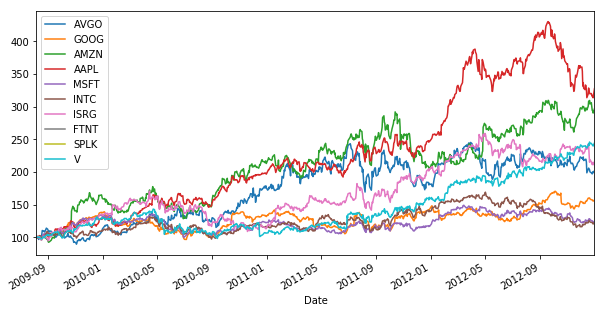

In [3]:
#normalizzo e plotto l'andamento fino al 2017 (!!!!!importante normalizzare cosi posso paragonare i risultati)
(pf_data/pf_data.iloc[0]*100).plot(figsize=(10,5))

In [25]:
#calcolo ritorno logaritmico gioraliero degli assets mel periodo selezionato
log_returns =np.log(pf_data/pf_data.shift(1))


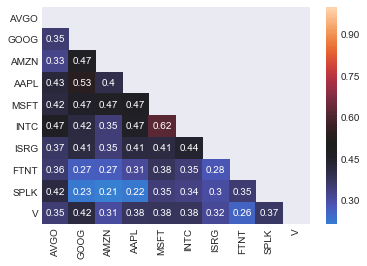

In [170]:
#cambia center per capire meglio la correlazione 
correlation = log_returns.corr()
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation,center=0.5,annot=True,mask=mask);

In [5]:
#percentuale di ritorno annua media di ogni stocks
log_returns.mean()*250*100

AVGO    20.544137
GOOG    13.186937
AMZN    31.791425
AAPL    34.652060
MSFT     6.264040
INTC     5.978258
ISRG    22.490597
FTNT    29.630100
SPLK   -28.711983
V       26.117911
dtype: float64

In [6]:
#Do i pesi al tuo portafoglio di investimento fatti da te
weights_iniziali=np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])

In [7]:
weights_iniziali

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [8]:
#ritorno atteso del tuo portafoglio negli anni indicati
rit=np.sum(weights_iniziali * log_returns.mean())*250
rit

0.16194348137181785

In [9]:
#volatilità attesa del tuo portafoglio negli anni indicati
vol=np.sqrt(np.dot(weights_iniziali.T, np.dot(log_returns.cov()*250,weights_iniziali)))
vol

0.21394055216629293

In [222]:
#genero tot combinazioni di peso per il tuo portafoglio (nel ciclo for inserisci il n combinazioni) per
#valutare tutte le possibili combinazioni di peso, scegliendo poi quella ottima
num_assets=len(assets)
pfoglio_returns=[]
pfoglio_volatilities=[]
pfoglio_weights=[]
pfoglio_sharpe_ratio = []
risk_free = 0.025 #bot 10 anni US
np.random.seed(333)
for x in range (1000):
    
    weights=np.random.random(num_assets)
    weights/=np.sum(weights)
    weights = np.around(weights,4)
    returns = np.around(np.sum(weights* log_returns.mean())*250,4)  
    volatility = np.around(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250,weights))),4)
    sharpe_ratio = np.around((returns - risk_free)/volatility,2)
    
    pfoglio_weights.append(weights)
    pfoglio_returns.append(returns)
    pfoglio_volatilities.append(volatility)
    pfoglio_sharpe_ratio.append(sharpe_ratio)

portfoglios=pd.DataFrame({'Return': pfoglio_returns, 'Volatility': pfoglio_volatilities,
                          'Sharpe Ratio': pfoglio_sharpe_ratio})
portfoglios=pd.concat([portfoglios, pd.DataFrame(pfoglio_weights)], axis=1);
columns_name = [ 'Returns', 'Volatility','Sharpe Ratio'] + ["Weight_" + assets for assets in assets]
portfoglios.columns= columns_name

In [223]:
portfoglios.head()



,Returns,Volatility,Sharpe Ratio,Weight_AVGO,Weight_GOOG,Weight_AMZN,Weight_AAPL,Weight_MSFT,Weight_INTC,Weight_ISRG,Weight_FTNT,Weight_SPLK,Weight_V
0,0.1679,0.2088,0.68,0.1618,0.2171,0.0050,0.0984,0.1098,0.0144,0.0311,0.0290,0.0731,0.2602
1,0.1189,0.2349,0.40,0.0114,0.0134,0.0529,0.0451,0.0387,0.0920,0.2087,0.1035,0.2127,0.2215
2,0.2038,0.2454,0.73,0.1872,0.1248,0.0327,0.0272,0.0109,0.0629,0.0184,0.2566,0.0519,0.2274
3,0.1920,0.2381,0.70,0.0742,0.0349,0.1791,0.2142,0.0394,0.0358,0.0011,0.1722,0.1457,0.1032
4,0.1977,0.2162,0.80,0.0411,0.0540,0.1429,0.1526,0.1515,0.0066,0.1254,0.1345,0.0804,0.1110


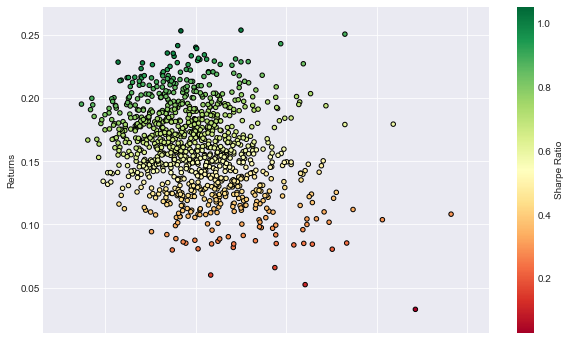

In [224]:
#plottiamo i dati delle combinazioni di portafoglio 
#portfoglios.iplot(x='Volatility', y='Returns', kind='scatter',mode='markers',size=5);
plt.style.use('seaborn-dark')
portfoglios.plot( x='Volatility', y='Returns', kind='scatter',figsize=(10,6),
                  c='Sharpe Ratio', cmap='RdYlGn', edgecolors='black',grid=True);


In [225]:
min_volatility = portfoglios['Volatility'].min()
max_sharpe = portfoglios['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = portfoglios.loc[portfoglios['Sharpe Ratio'] == max_sharpe]
min_variance_port = portfoglios.loc[portfoglios['Volatility'] == min_volatility]

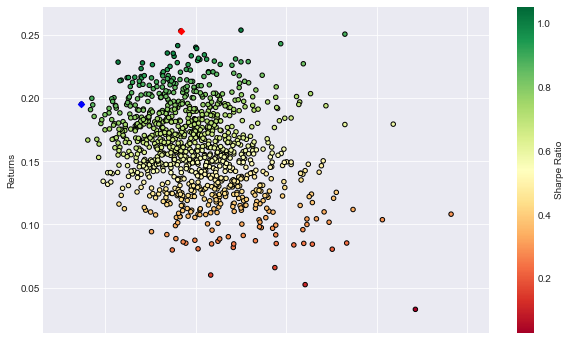

In [226]:
plt.style.use('seaborn-dark')
portfoglios.plot( x='Volatility', y='Returns', kind='scatter',figsize=(10,6),
                  c='Sharpe Ratio', cmap='RdYlGn', edgecolors='black',grid=True);
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], 
            c='red', marker='D', s=20);
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], 
            c='blue', marker='D', s=20);

In [232]:
display(min_variance_port)
display(sharpe_portfolio)


,Returns,Volatility,Sharpe Ratio,Weight_AVGO,Weight_GOOG,Weight_AMZN,Weight_AAPL,Weight_MSFT,Weight_INTC,Weight_ISRG,Weight_FTNT,Weight_SPLK,Weight_V
346,0.1955,0.1947,0.88,0.021,0.0966,0.1133,0.1834,0.1846,0.1618,0.0925,0.0265,0.0045,0.1158


,Returns,Volatility,Sharpe Ratio,Weight_AVGO,Weight_GOOG,Weight_AMZN,Weight_AAPL,Weight_MSFT,Weight_INTC,Weight_ISRG,Weight_FTNT,Weight_SPLK,Weight_V
620,0.2536,0.2167,1.05,0.0284,0.1225,0.2088,0.2281,0.0218,0.0417,0.1454,0.1012,0.0128,0.0893


array([0.0652963 , 0.14088583, 0.09668835, 0.14846459, 0.11245213,
       0.12980506, 0.04090164, 0.02054432, 0.0577584 , 0.18720339])

In [ ]:
#inserisci il capitale da invesitre
capitale=100
for i in range(num_assets):
    print(assets[i] + ' = ' + str(round(pweights[indice][i]*capitale,2) ))

    

In [ ]:
labels = ['AVGO', 'GOOG', 'AMZN','AAPL', 'MSFT','INTC','ISRG','FTNT','SPLK','V']
values = pweights[indice]
colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value',
               textfont=dict(size=20),
               marker=dict(colors=colors,
                           line=dict(color='#000000', width=2)))

py.iplot([trace], filename='styled_pie_chart')

In [71]:
#comparo rendimenti e volatilità
print('Tuo portafoglio ------------------>' + ' Ritorno'+' = '+str(round(rit,3)*100)+ '%  ' + 'Volatilità' + ' = '+ str(round(vol,3)*100)+'%')
print('Portafoglio volatilità minima ---->' + ' Ritorno'+' = '+str(round(pfoglio_returns[indice],3)*100)+ '%  ' + 'Volatilità' + ' = '+ str(round(pfoglio_volatilities[indice],3)*100)+'%')

Tuo portafoglio ------------------> Ritorno = 16.2%  Volatilità = 21.4%
Portafoglio volatilità minima ----> Ritorno = 18.099999999999998%  Volatilità = 19.2%


In [72]:
#testiamo i tuoi portafoglio dal 2017 in poi (fingo che ci troviamo nel 2017, costruisco i portafogli con i dati fino al 2017)
#dal 2017 ad oggi lo considero futuro.
#vediamo cosa succede

In [75]:
#estrapolo i dati dal 2017 in poi 
assets=['AVGO', 'GOOG', 'AMZN','AAPL', 'MSFT','INTC','ISRG','FTNT','SPLK','V']
pf_data2 = pd.DataFrame()

for a in assets:
    pf_data2[a]= wb.DataReader(a,data_source='yahoo', start ='2013-1-1')['Adj Close']

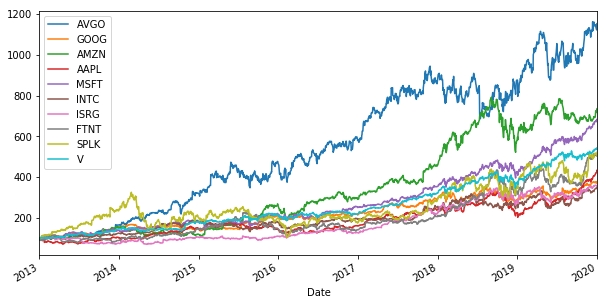

In [76]:
#normalizzo e plotto l'andamento dal 2017 a oggi
(pf_data2/pf_data2.iloc[0]*100).plot(figsize=(10,5))

In [77]:
#wooooooo che andamento apps


In [78]:
#adesso inizia il processo di calcolo dei rendimenti e volaitilà del tuo portafoglio e quello fatto per avere volatilità minima
#calcolo ritorno logaritmico gioraliero degli assets
log_returns2 =np.log(pf_data2/pf_data2.shift(1))

In [79]:
#percentuale di ritorno annua media di ogni stocks
log_returns2.mean()*250*100

AVGO    34.330331
GOOG    18.843713
AMZN    28.163164
AAPL    20.749301
MSFT    27.122090
INTC    17.631845
ISRG    18.076350
FTNT    23.509514
SPLK    23.370019
V       23.950200
dtype: float64

In [80]:
rit2=np.sum(weights_iniziali * log_returns2.mean())*250
vol2=np.sqrt(np.dot(weights_iniziali.T, np.dot(log_returns2.cov()*250,weights_iniziali)))
rit_pm=np.sum(pweights[indice] * log_returns2.mean())*250
vol_pm=np.sqrt(np.dot(pweights[indice].T, np.dot(log_returns2.cov()*250,pweights[indice])))
print('Tuo portafoglio ------------------>' + ' Ritorno'+' = '+str(round(rit2,3)*100)+ '%  ' + 'Volatilità' + ' = '+ str(round(vol2,3)*100)+'%')
print('Portafoglio volatilità minima ---->' + ' Ritorno'+' = '+str(round(rit_pm,3)*100)+ '%  ' + 'Volatilità' + ' = '+ str(round(vol_pm,3)*100)+'%')


Tuo portafoglio ------------------> Ritorno = 23.599999999999998%  Volatilità = 18.8%
Portafoglio volatilità minima ----> Ritorno = 22.3%  Volatilità = 17.4%


In [81]:
#genero tot combinazioni di peso per il tuo portafoglio (nel ciclo for inserisci il n combinazioni) per
#valutare tutte le possibili combinazioni di peso, scegliendo poi quella ottima
num_assets=len(assets)
pfoglio_returns2=[]
pfoglio_volatilities2=[]
pweights2=[]
for x in range (10000):
    weights2=np.random.random(num_assets)
    weights2/=np.sum(weights2)
    pweights.append(weights2)
   
    pfoglio_returns2.append(np.sum(weights2* log_returns2.mean())*250)
    pfoglio_volatilities2.append(np.sqrt(np.dot(weights2.T, np.dot(log_returns2.cov()*250,weights2))))

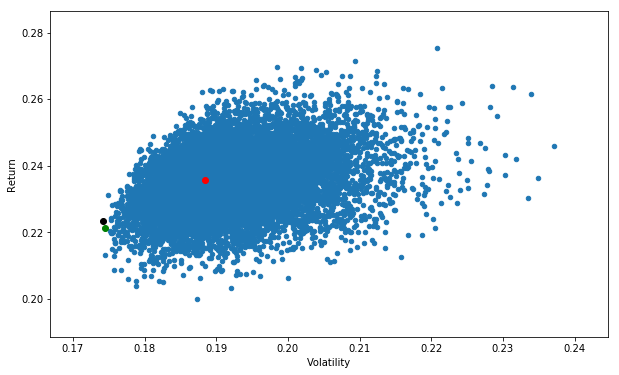

In [86]:
#plottiamo i dati delle combinazioni di portafoglio 
portfoglios=pd.DataFrame({'Return': pfoglio_returns2, 'Volatility': pfoglio_volatilities2})

portfoglios.plot( x='Volatility', y='Return', kind='scatter',figsize=(10,6))
#il tuo portafoglio iniziale
plt.plot(vol2,rit2,'ro')
#vecchio con volatilità minima
plt.plot(vol_pm,rit_pm,'ko')
#nuovo volatilità minima
indice=pfoglio_volatilities2.index(min(pfoglio_volatilities2))
plt.plot(pfoglio_volatilities2[indice],pfoglio_returns2[indice],'go')